**IMPORT LIBRARIES**

In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy import stats
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

**Load and Explore the Data**

In [21]:
data= pd.read_csv('/content/ottdata.csv')
print(data.shape)
print(data.info())
print(data.head())

(1000, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   visitors            1000 non-null   float64
 1   ad_impressions      1000 non-null   float64
 2   major_sports_event  1000 non-null   int64  
 3   genre               1000 non-null   object 
 4   dayofweek           1000 non-null   object 
 5   season              1000 non-null   object 
 6   views_trailer       1000 non-null   float64
 7   views_content       1000 non-null   float64
dtypes: float64(4), int64(1), object(3)
memory usage: 62.6+ KB
None
   visitors  ad_impressions  major_sports_event     genre  dayofweek  season  \
0      1.67         1113.81                   0    Horror  Wednesday  Spring   
1      1.46         1498.41                   1  Thriller     Friday    Fall   
2      1.47         1079.19                   1  Thriller  Wednesday    Fall   
3      

 **Perform Exploratory Data Analysis (EDA)**

**What does the distribution of content views look like?**
**What does the distribution of genres look like?**

<Axes: xlabel='genre'>

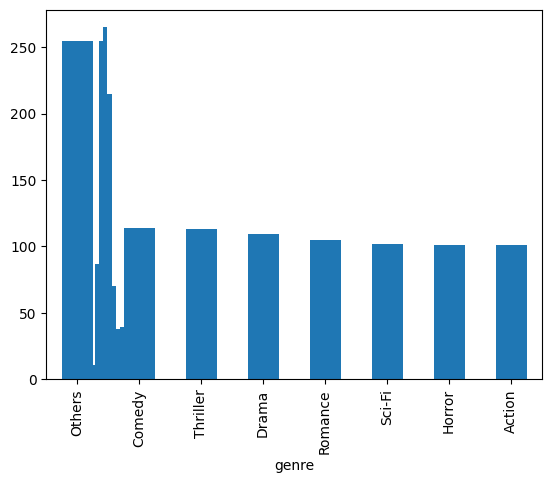

In [22]:
#Univariate Analysis:
data['views_content'].hist()
data['genre'].value_counts().plot(kind='bar')

**The day of the week on which content is released generally plays a key role in the viewership. How does the viewership vary with the day of release?**

<ipython-input-23-0d6e47f0c279>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_views_by_day.index, y=avg_views_by_day.values, palette='viridis')


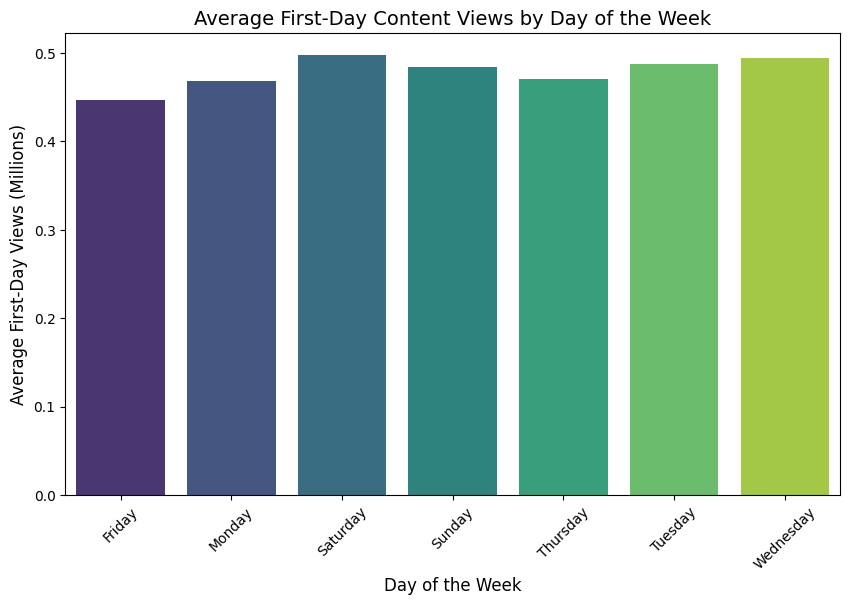

In [23]:
avg_views_by_day = data.groupby('dayofweek')['views_content'].mean()

# Plotting the average first-day views per day of the week
plt.figure(figsize=(10,6))
sns.barplot(x=avg_views_by_day.index, y=avg_views_by_day.values, palette='viridis')

# Add titles and labels
plt.title('Average First-Day Content Views by Day of the Week', fontsize=14)
plt.xlabel('Day of the Week', fontsize=12)
plt.ylabel('Average First-Day Views (Millions)', fontsize=12)
plt.xticks(rotation=45)

# Display the plot
plt.show()

**How does the viewership vary with the season of release?**

,views_trailer,views_content
views_trailer,1.000000,0.753962
views_content,0.753962,1.000000


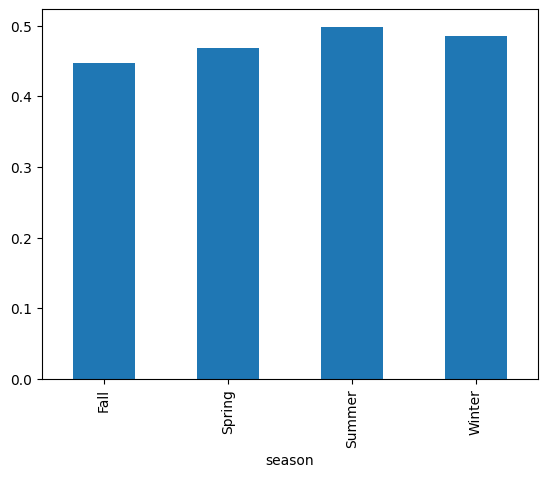

In [24]:
#Bivariate Analysis
data.groupby('dayofweek')['views_content'].mean().plot(kind='bar')
data.groupby('season')['views_content'].mean().plot(kind='bar')
data[['views_trailer', 'views_content']].corr()

**What is the correlation between trailer views and content views?**

Pearson correlation between trailer views and content views: 0.753962214820536


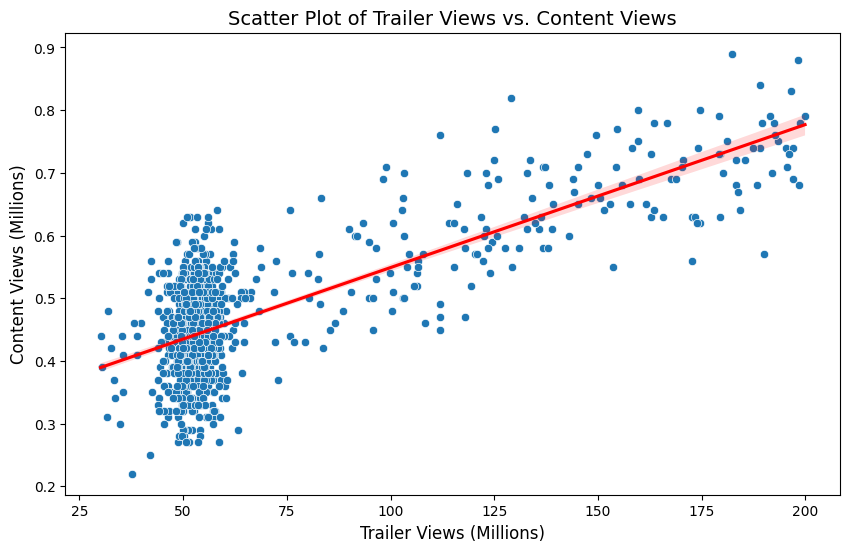

In [40]:
correlation = data['views_trailer'].corr(data['views_content'])

# Display the correlation coefficient
print(f'Pearson correlation between trailer views and content views: {correlation}')

# Plot a scatter plot to visualize the relationship between trailer views and content views
plt.figure(figsize=(10,6))
sns.scatterplot(x='views_trailer', y='views_content', data=data)

# Add a line of best fit
sns.regplot(x='views_trailer', y='views_content', data=dataSSSSSSSS, scatter=False, color='red')

# Add labels and title
plt.title('Scatter Plot of Trailer Views vs. Content Views', fontsize=14)
plt.xlabel('Trailer Views (Millions)', fontsize=12)
plt.ylabel('Content Views (Millions)', fontsize=12)

# Display the plot
plt.show()

**Data Preprocessing**

In [25]:
#Identify and handle any missing data
missing_values = data.isnull().sum()
print(missing_values)

visitors              0
ad_impressions        0
major_sports_event    0
genre                 0
dayofweek             0
season                0
views_trailer         0
views_content         0
dtype: int64


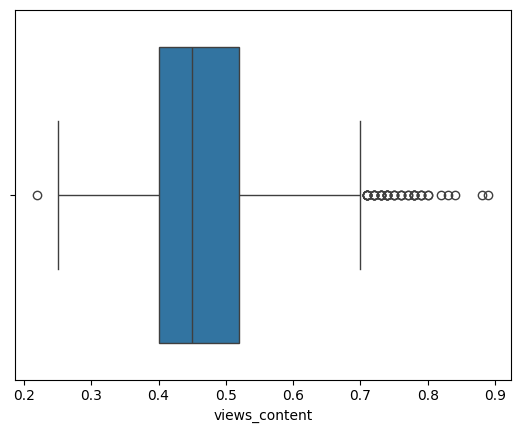

In [26]:
# Identify outliers using box plots
sns.boxplot(x=data['views_content'])
#Removing outliers using IQR
Q1 = data['views_content'].quantile(0.25)
Q3 = data['views_content'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
data_no_outliers = data[~((data['views_content'] < lower_bound) | (data['views_content'] > upper_bound))]

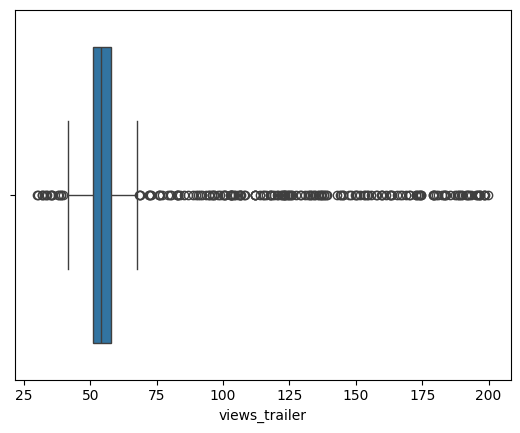

     visitors  ad_impressions  major_sports_event     genre  dayofweek  \
13       1.55         1010.87                   1     Drama     Friday   
16       1.85         1590.19                   0  Thriller  Wednesday   
18       1.79         1686.75                   1    Sci-Fi   Saturday   
22       1.41         1383.58                   0    Comedy   Saturday   
27       1.59         1172.70                   1    Sci-Fi   Thursday   
..        ...             ...                 ...       ...        ...   
987      2.14         1629.94                   0   Romance   Saturday   
992      1.57         1383.58                   0  Thriller     Friday   
994      1.46         1342.77                   0    Action  Wednesday   
996      1.34         1329.48                   0    Action     Friday   
997      1.62         1359.80                   1    Sci-Fi  Wednesday   

     season  views_trailer  views_content  
13   Winter         190.02           0.57  
16     Fall         195

In [27]:
sns.boxplot(x=data['views_trailer'])
plt.show()
Q1 = data['views_trailer'].quantile(0.25)
Q3 = data['views_trailer'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = data[(data['views_trailer'] < lower_bound) | (data['views_trailer'] > upper_bound)]
print(outliers)

In [28]:
#Feature Engineering
data = pd.get_dummies(data, columns=['genre', 'dayofweek', 'season'], drop_first=True)

**Build the Linear Regression Model**

In [29]:
#Define Features and Target
X = data.drop(columns=['views_content'])
y = data['views_content']


In [30]:
#Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [31]:
#Fiting  the Model
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [32]:
#Display the model coefficients to understand the impact of each feature
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print(coefficients)


                     Coefficient
visitors                0.128909
ad_impressions          0.000008
major_sports_event     -0.059559
views_trailer           0.002311
genre_Comedy            0.004389
genre_Drama             0.010636
genre_Horror            0.009434
genre_Others            0.004984
genre_Romance          -0.001385
genre_Sci-Fi            0.010008
genre_Thriller          0.011518
dayofweek_Monday        0.045065
dayofweek_Saturday      0.052561
dayofweek_Sunday        0.038818
dayofweek_Thursday      0.019637
dayofweek_Tuesday       0.032412
dayofweek_Wednesday     0.049532
season_Spring           0.023201
season_Summer           0.044605
season_Winter           0.026532


**Test the Assumptions of Linear Regression**

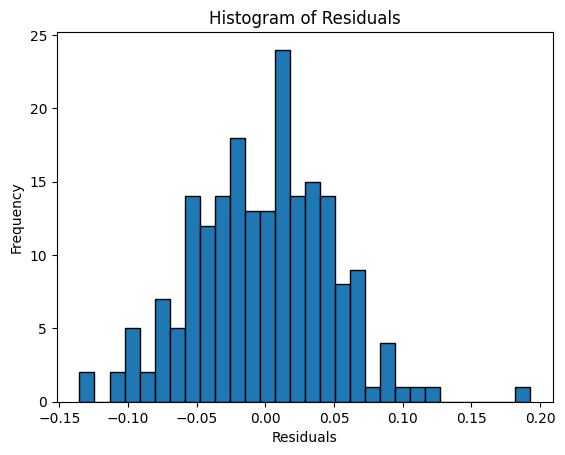

In [33]:
residuals = y_test - y_pred
plt.hist(residuals, bins=30, edgecolor='black')
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

**Model Performance Evaluation**

In [34]:
#Use metrics like R-squared, Mean Squared Error (MSE), and Mean Absolute Error (MAE)
y_pred = model.predict(X_test)
print(f'R-squared: {r2_score(y_test, y_pred)}')
print(f'MSE: {mean_squared_error(y_test, y_pred)}')
print(f'MAE: {mean_absolute_error(y_test, y_pred)}')


R-squared: 0.7743076305248305
MSE: 0.0025027878839796315
MAE: 0.03988869442513341
